<a href="https://colab.research.google.com/github/debabratoRoy/Gravitational-Wave-Open-Data-Workshop/blob/main/Intro_to_GWpy_exer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
pip install -q gwpy

In [2]:
pip install -q gwosc

In [3]:
import gwpy
from gwosc.datasets import event_gps, find_datasets, run_segment
from gwpy.timeseries import TimeSeries

In [4]:
import matplotlib.pyplot as plt
from scipy.signal import get_window

## Challenges

### Quiz Question 1:
Looking at the LIGO-Livingston data in the time domain, the peak amplitude of the gravitational-wave signal of GW190412 occurs at the center of the figure, that is, at approximately 5 seconds from the start of the segment. This peack is undetectable above the background noise by the eye. Plot the data for the LIGO-Hanford detector around GW190412. Looking at your new LIGO-Handford plot, can your eye identify a signal peak? What about Virgo data?

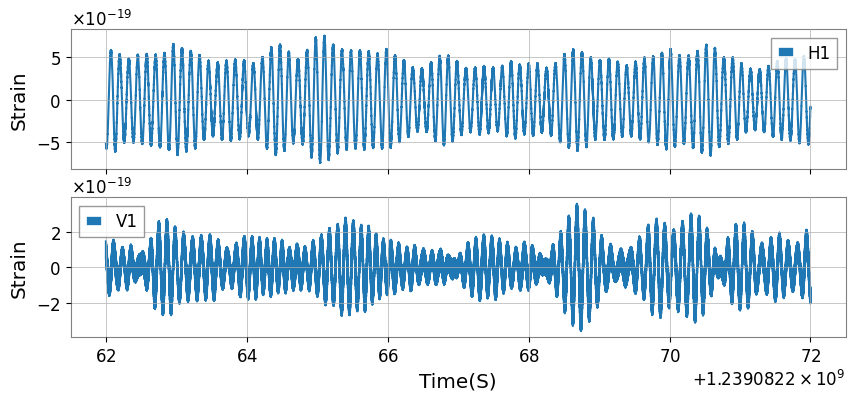

In [48]:
gps = event_gps('GW190412')
segment = (int(gps),int(gps)+10)

han_data = TimeSeries.fetch_open_data('H1', *segment)
vir_data = TimeSeries.fetch_open_data('V1', *segment)

# plotting data
fig, ax = plt.subplots(2,1, figsize=(10,4),sharex=True)

ax[0].plot(han_data.times, han_data,label='H1')
ax[1].plot(vir_data.times,vir_data,label='V1')

ax[1].set_xlabel('Time(S)')
ax[0].set_ylabel('Strain')
ax[1].set_ylabel('Strain')

ax[0].legend()
ax[1].legend()
plt.show()

### Quiz Question 2 :
Make an ASD around the time of an O1 event, GW150914 for L1 detector.  Compare this with the ASDs around GW190412 for L1 detector.  Which data have lower noise - and so are more sensitive - around 100 Hz?

ASD at 100Hz for GW150914:  1.468072730272917e-22 1 / Hz(1/2)
ASD at 100Hz for GW190412:  1.192307738282559e-23 1 / Hz(1/2)
GW190412 has lower noise around 100Hz


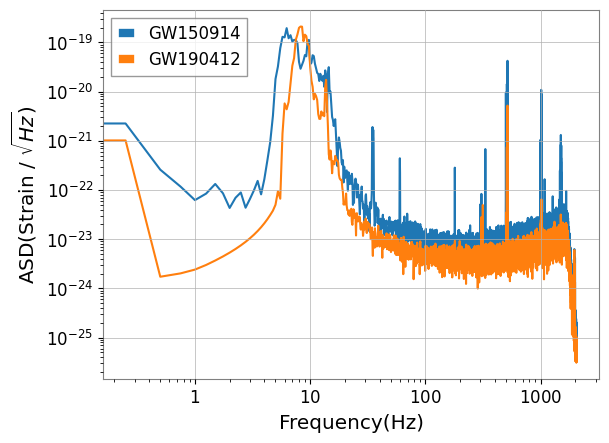

In [31]:
# ASD for GW150914
segment_1 = (int(event_gps('GW150914')) - 5, int(event_gps('GW150914')) + 5 )
L1_GW150914_data = TimeSeries.fetch_open_data('L1',*segment_1)
L1_GW150914_asd = L1_GW150914_data.asd(fftlength=4,method='median')

# ASD for GW190412
segment_2 = (int(event_gps('GW190412')) - 5, int(event_gps('GW190412')) + 5 )
L1_GW190412_data = TimeSeries.fetch_open_data('L1',*segment_2)
L1_GW190412_asd = L1_GW190412_data.asd(fftlength=4,method='median')

plt.figure()
plt.loglog(L1_GW150914_asd.frequencies, L1_GW150914_asd,label='GW150914')
plt.loglog(L1_GW190412_asd.frequencies, L1_GW190412_asd,label='GW190412')
plt.xlabel('Frequency(Hz)')
plt.ylabel('ASD(Strain / $\sqrt{Hz}$)')
plt.legend()

print('ASD at 100Hz for GW150914: ',  L1_GW150914_asd[100])
print('ASD at 100Hz for GW190412: ',  L1_GW190412_asd[100])

if L1_GW150914_asd[100] > L1_GW190412_asd[100]: print('GW190412 has lower noise around 100Hz')
else: print('GW150914 has lower noise around 100Hz')